In [45]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
acs_dataframe_raw = pd.read_csv('Datathon_Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv')
meat_production_raw = pd.read_csv('Datathon_Data/Meat_Stats_Meat_Production.csv')
nutrition_raw = pd.read_csv('Datathon_Data/Nutrition_Physical_Activity_and_Obesity_Data.csv')
acs_dataframe = acs_dataframe_raw.copy()
meat_production = meat_production_raw.copy()
nutrition = nutrition_raw.copy()
meat_production['Production'] = meat_production['Production'].str.replace(",","").astype(float)
print(acs_dataframe_raw['Label (Grouping)'].unique())

['EMPLOYMENT STATUS' 'Population 16 years and over'
 '\xa0\xa0\xa0\xa0In labor force'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Civilian labor force'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Employed'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Unemployed'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Armed Forces'
 '\xa0\xa0\xa0\xa0Not in labor force'
 '\xa0\xa0\xa0\xa0Civilian labor force'
 '\xa0\xa0\xa0\xa0Percent Unemployed' 'Females 16 years and over'
 'Own children under 6 years'
 '\xa0\xa0\xa0\xa0All parents in family in labor force'
 'Own children 6 to 17 years' 'COMMUTING TO WORK'
 'Workers 16 years and over'
 '\xa0\xa0\xa0\xa0Car, truck, or van -- drove alone'
 '\xa0\xa0\xa0\xa0Car, truck, or van -- carpooled'
 '\xa0\xa0\xa0\xa0Public transportation (excluding taxicab)'
 '\xa0\xa0\xa0\xa0Walked' '\xa0\xa0\xa0\xa0Other means'
 '\xa0\xa0\xa0\xa0Worked at home'
 '\xa0\xa0\xa0\xa0Mean travel time to work (minutes)' 'OCCUPATION'
 'Civilian employed population 16 years and over'
 '\xa0\

/var/folders/96/s7zm7_qd5tl766bx8kyp31gm0000gn/T/ipykernel_68267/2948597331.py:3: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  nutrition_raw = pd.read_csv('Datathon_Data/Nutrition_Physical_Activity_and_Obesity_Data.csv')


In [47]:
acs_dataframe['Label (Grouping)'] = acs_dataframe['Label (Grouping)'].str.strip()
employed = acs_dataframe[(acs_dataframe['Label (Grouping)'] == 'Employed')].copy()
employed['Estimate'] = employed['Estimate'].str.replace(",", "").astype(int)
public_coverage = acs_dataframe[(acs_dataframe['Label (Grouping)'] == 'With public coverage') 
                                & (acs_dataframe['Estimate'] != '(X)')].copy()
public_coverage['Estimate'] = public_coverage['Estimate'].str.replace(",", "").astype(float)
public_transportation = acs_dataframe[acs_dataframe['Label (Grouping)'] == 'Public transportation (excluding taxicab)'].copy()
public_transportation['Estimate'] = public_transportation['Estimate'].str.replace(",","").astype(float)
food_stamp_SNAP = acs_dataframe[acs_dataframe['Label (Grouping)'] == 'With Food Stamp/SNAP benefits in the past 12 months'].copy()
food_stamp_SNAP['Estimate'] = food_stamp_SNAP['Estimate'].str.replace(",","").astype(float)
public_transportation.head(10)

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
22,Public transportation (excluding taxicab),COMMUTING TO WORK,Alabama,9062.0,±673,0.5%,±0.1,2010
167,Public transportation (excluding taxicab),COMMUTING TO WORK,Alaska,4446.0,±461,1.3%,±0.1,2010
312,Public transportation (excluding taxicab),COMMUTING TO WORK,Arizona,54275.0,"±2,184",2.0%,±0.1,2010
457,Public transportation (excluding taxicab),COMMUTING TO WORK,Arkansas,5321.0,±562,0.4%,±0.1,2010
602,Public transportation (excluding taxicab),COMMUTING TO WORK,California,834363.0,"±7,357",5.1%,±0.1,2010
747,Public transportation (excluding taxicab),COMMUTING TO WORK,Colorado,79899.0,"±2,330",3.3%,±0.1,2010
892,Public transportation (excluding taxicab),COMMUTING TO WORK,Connecticut,76305.0,"±1,921",4.4%,±0.1,2010
1037,Public transportation (excluding taxicab),COMMUTING TO WORK,Delaware,13062.0,±899,3.2%,±0.2,2010
1182,Public transportation (excluding taxicab),COMMUTING TO WORK,District of Columbia,110108.0,"±2,387",37.6%,±0.8,2010
1327,Public transportation (excluding taxicab),COMMUTING TO WORK,Florida,160236.0,"±4,375",2.0%,±0.1,2010


/var/folders/96/s7zm7_qd5tl766bx8kyp31gm0000gn/T/ipykernel_68267/619889841.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  yearly_df = pd.concat([yearly_df, pd.DataFrame({'Year': [year],


Year                       int64
Employed                   int64
Meat_Production          float64
Public_Coverage          float64
Obesity                  float64
Public_Transportation    float64
dtype: object


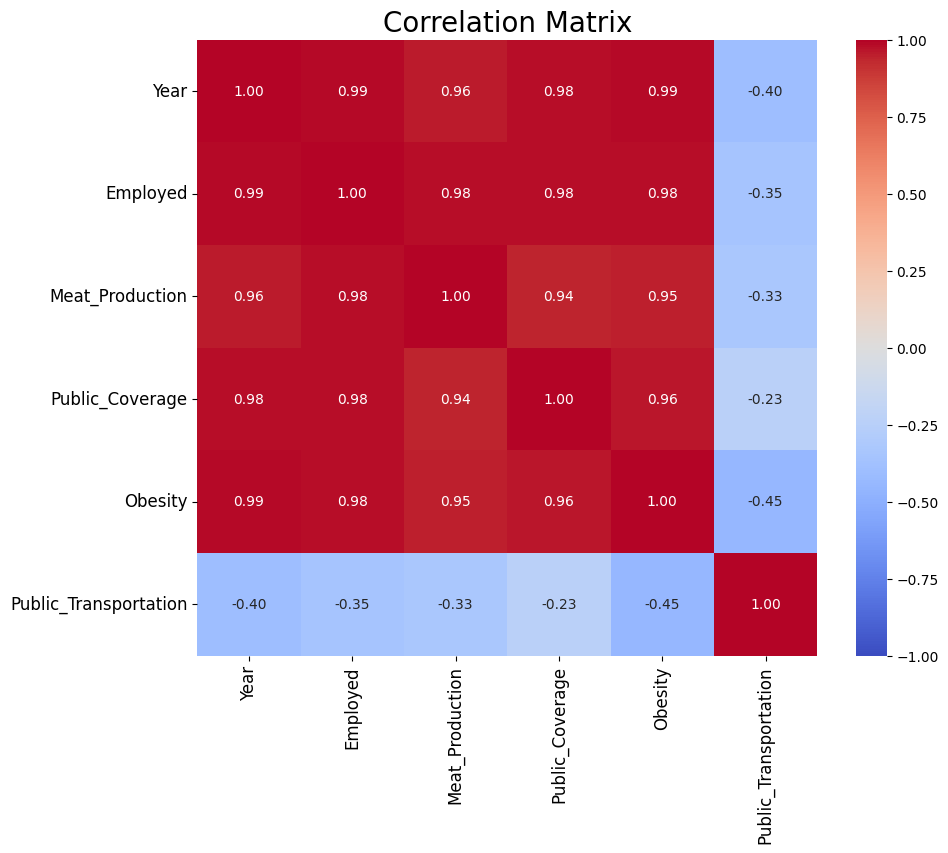

                           Year  Employed  Meat_Production  Public_Coverage  \
Year                   1.000000  0.991997         0.957357         0.982592   
Employed               0.991997  1.000000         0.981279         0.981897   
Meat_Production        0.957357  0.981279         1.000000         0.943883   
Public_Coverage        0.982592  0.981897         0.943883         1.000000   
Obesity                0.990776  0.981622         0.949928         0.962757   
Public_Transportation -0.404220 -0.353264        -0.330433        -0.234551   

                        Obesity  Public_Transportation  
Year                   0.990776              -0.404220  
Employed               0.981622              -0.353264  
Meat_Production        0.949928              -0.330433  
Public_Coverage        0.962757              -0.234551  
Obesity                1.000000              -0.450619  
Public_Transportation -0.450619               1.000000  


In [48]:
yearly_df = pd.DataFrame(columns=['Year', 'Employed', 'Meat_Production', 'Public_Coverage', 
                                  'Obesity', 'Public_Transportation'])
for year in range(2012, 2023):
    total_employed = (employed[employed['Year'] == year]['Estimate'].sum())
    total_meat_production = meat_production[meat_production['Year'] == year]['Production'].sum()
    total_public_coverage = public_coverage[public_coverage['Year'] == year]['Estimate'].sum()
    mean_obesity_us = nutrition[(nutrition['YearEnd'] == year) & 
                                (nutrition['Question'] == 'Percent of adults aged 18 years and older who have obesity')]['Data_Value'].mean()
    total_public_transportation = public_transportation[public_transportation['Year'] == year]['Estimate'].sum()
    
    yearly_df = pd.concat([yearly_df, pd.DataFrame({'Year': [year], 
                                                    'Employed': [total_employed], 
                                                    'Meat_Production': [total_meat_production],
                                                    'Public_Coverage': [total_public_coverage],
                                                    'Obesity' : [mean_obesity_us],
                                                    'Public_Transportation': [total_public_transportation]})], ignore_index=True)

for feature in yearly_df.columns:
    yearly_df[feature] = pd.to_numeric(yearly_df[feature], errors="coerce")
    
print(yearly_df.dtypes)
corr_mat = yearly_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
print(corr_mat)


### Now we aim to build a robust regression model that could be potentially used to predict future obesity rate in the United States.

In [49]:
yearly_df = sm.add_constant(yearly_df)
X = yearly_df[['Public_Transportation', 'Employed']]
Y = yearly_df['Obesity']
model = sm.OLS(Y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Obesity   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.851e+04
Date:                Wed, 31 Jul 2024   Prob (F-statistic):                    5.44e-17
Time:                        16:43:20   Log-Likelihood:                         -7.6429
No. Observations:                  11   AIC:                                      19.29
Df Residuals:                       9   BIC:                                      20.08
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

/Users/tony/myenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
